In [23]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, average_precision_score, auc, f1_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the given input data file for training the model
data = pd.read_csv('Fraud_Detection_Dataset.csv')
data = data.dropna(subset=['Response']) # dropping rows with null/NaN values in response
      
# dropping the response column and seperating the predictors from the training dataset
X_dataset = data.drop('Response', axis=1)

# storing the response data sepeartely from the training dataset
y_dataset = data['Response']

# checking for null values
X_dataset.isna().sum()

X1      0
X2      0
X3      0
X4      0
X5      0
       ..
X196    0
X197    0
X198    0
X199    0
X200    0
Length: 200, dtype: int64

In [8]:
# imputating the data to handle null values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_dataset)
y_imputed = y_dataset.values

# preprocessing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# selection of features
selector = SelectKBest(score_func=f_classif, k=150)
X_selected = selector.fit_transform(X_scaled, y_imputed)

In [9]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_imputed, test_size=0.2, random_state=42)
# y_train = y_train.astype(int)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced')

rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

# converting y_test to binary values
y_test = np.where(y_test >= 0.5, 1, 0)

# evaluating Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.88925


In [17]:
# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42) #, class_weight='balanced')
gb_classifier.fit(X_train, y_train)
gb_y_pred = gb_classifier.predict(X_test)

# converting y_test to binary values
y_test = np.where(y_test >= 0.5, 1, 0)
# gb_y_pred = gb_y_pred.astype(int)

# evaluating Gradient Boosting Classifier
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Accuracy: 0.89315625


[0.88925, 0.89315625]


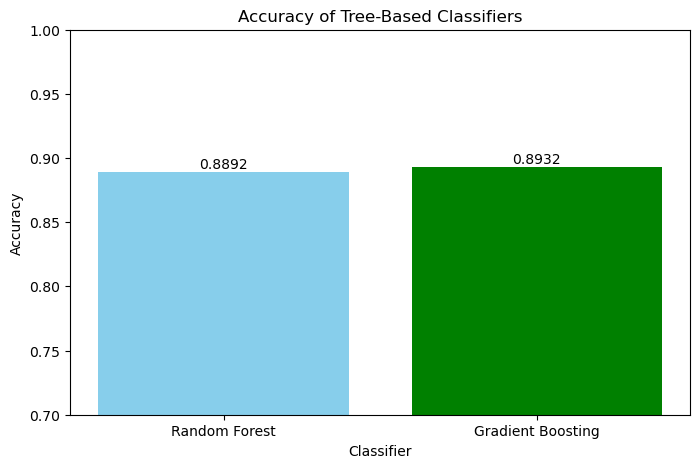

In [18]:
# accuracy scores
accuracies = [rf_accuracy, gb_accuracy]
print(accuracies)
classifiers = ['Random Forest', 'Gradient Boosting']

# Plot for accuracy in both models
plt.figure(figsize=(8, 5))
bars = plt.bar(classifiers, accuracies, color=['skyblue', 'green'])
plt.title('Accuracy of Tree-Based Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)  # Set y-axis limit for better visualization

# annotate bars with the corresponding accuracy values
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 4),
             ha='center', va='bottom', fontsize=10)

plt.show()

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

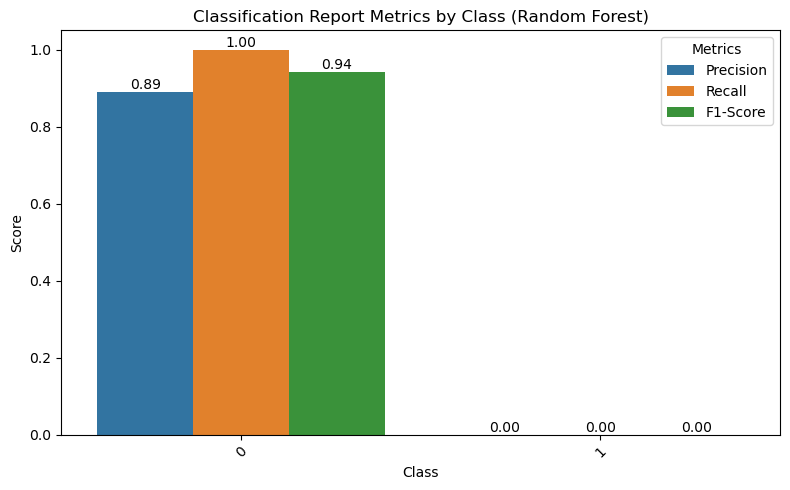

In [19]:
# classification report for random forest
rf_report = classification_report(y_test, rf_y_pred, output_dict=True)

# extracting precision, recall, and F1-score for each class
classes = list(rf_report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision = [rf_report[c]['precision'] for c in classes]
recall = [rf_report[c]['recall'] for c in classes]
f1_score = [rf_report[c]['f1-score'] for c in classes]

# creating dataframe for easier plotting
df = pd.DataFrame({'Class': classes * 3,
                   'Score': precision + recall + f1_score,
                   'Metric': ['Precision'] * len(classes) + ['Recall'] * len(classes) + ['F1-Score'] * len(classes)})

# Plot for classification report in Random Forest
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df, x='Class', y='Score', hue='Metric')
plt.title('Classification Report Metrics by Class (Random Forest)')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')

# annotating bars with the corresponding values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

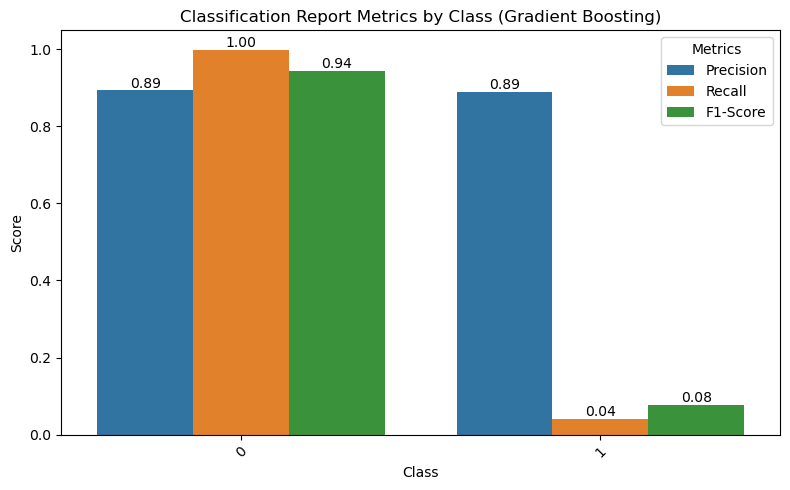

In [20]:
# classification report for gradient boosting
gb_report = classification_report(y_test, gb_y_pred, output_dict=True)

# Extract precision, recall, and F1-score for each class
classes = list(gb_report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision = [gb_report[c]['precision'] for c in classes]
recall = [gb_report[c]['recall'] for c in classes]
f1_score = [gb_report[c]['f1-score'] for c in classes]

# creating dataframe for easier plotting
df = pd.DataFrame({'Class': classes * 3,
                   'Score': precision + recall + f1_score,
                   'Metric': ['Precision'] * len(classes) + ['Recall'] * len(classes) + ['F1-Score'] * len(classes)})

# Plot for classification report in Gradient Boosting
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df, x='Class', y='Score', hue='Metric')
plt.title('Classification Report Metrics by Class (Gradient Boosting)')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')

# Annotate bars with the corresponding values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

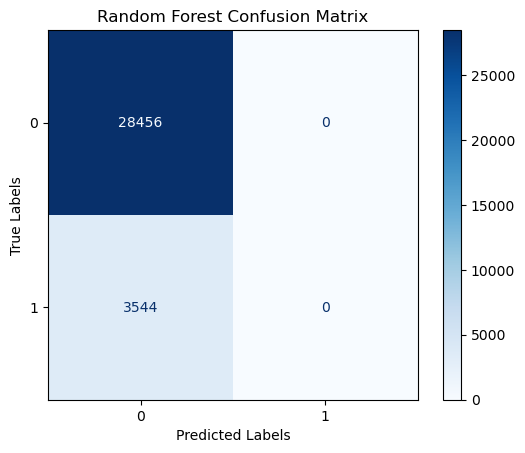

In [25]:
# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_y_pred)

# Plot for confusion matrix (regular - '0', fradulent - '1')
ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=[0, 1]).plot(
    cmap='Blues',
    colorbar=True)

plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.grid(False)
plt.show()

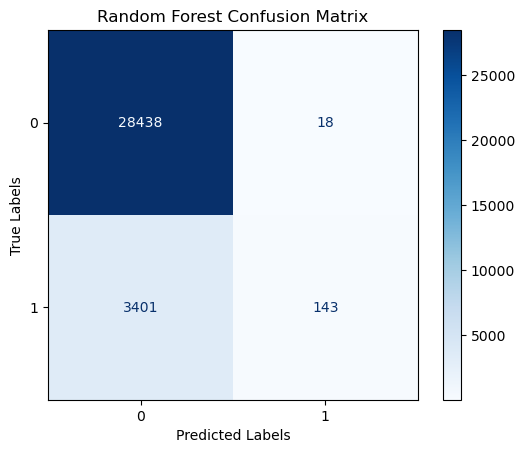

In [26]:
# Confusion Matrix for Gradient Boosting
gb_cm = confusion_matrix(y_test, gb_y_pred)

# Plot for confusion matrix (regular - '0', fradulent - '1')
ConfusionMatrixDisplay(confusion_matrix=gb_cm, display_labels=[0, 1]).plot(
    cmap='Blues',
    colorbar=True)

plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.grid(False)
plt.show()

In [27]:
# Predict probabilities for positive class (class 1)
rf_y_prob = rf_classifier.predict_proba(X_test)[:, 1]
gb_y_prob = gb_classifier.predict_proba(X_test)[:, 1]

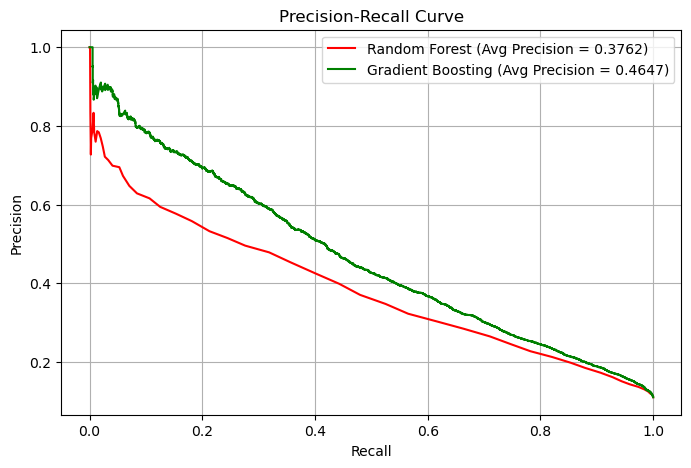

In [28]:
# computing precision-recall pairs for Random Forest
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_y_prob)
rf_avg_precision = average_precision_score(y_test, rf_y_prob)

# computing precision-recall pairs for Gradient Boosting
gb_precision, gb_recall, _ = precision_recall_curve(y_test, gb_y_prob)
gb_avg_precision = average_precision_score(y_test, gb_y_prob)

# Plot for Precision-Recall curve for Random Forest
plt.figure(figsize=(8, 5))
plt.plot(rf_recall, rf_precision, label=f'Random Forest (Avg Precision = {rf_avg_precision:.4f})', color='red')
plt.plot(gb_recall, gb_precision, label=f'Gradient Boosting (Avg Precision = {gb_avg_precision:.4f})', color='green')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

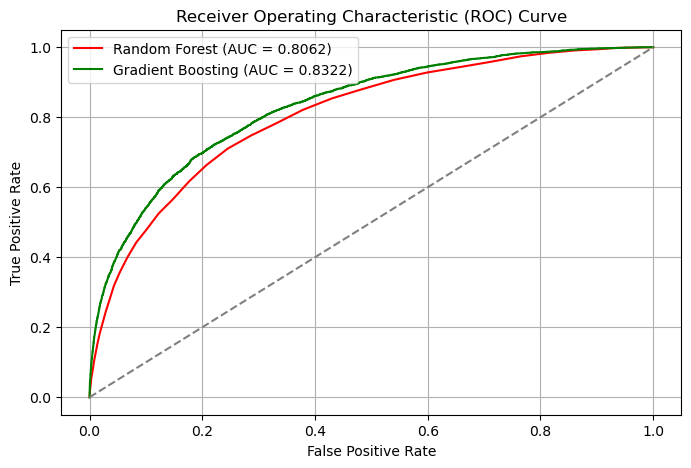

In [29]:
# computing ROC curve and ROC area for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_prob)
rf_auc = roc_auc_score(y_test, rf_y_prob)

# computing ROC curve and ROC area for Gradient Boosting
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_y_prob)
gb_auc = roc_auc_score(y_test, gb_y_prob)

# Plot for ROC curve for Random Forest
plt.figure(figsize=(8, 5))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.4f})', color='red')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.4f})', color='green')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plot diagonal line for reference

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()